# Topic: LogisticRegression and SVC-StudentGrade

## Step 1 得到資料: Get Data

In [1]:
#import套件
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pyplot as plt

#讀入csv文字檔
data=pd.read_csv('grade_training.csv')#訓練集
test=pd.read_csv("grade_testing.csv")#預測集

#去掉有nan的索引項
data=data.dropna()

'''
#查看表格
print(data.head())
print(test.head())

#查看表格資訊
data.info()
test.info()
'''


'\n#查看表格\nprint(data.head())\nprint(test.head())\n\n#查看表格資訊\ndata.info()\ntest.info()\n'

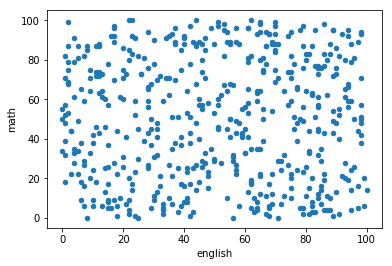

In [2]:
#我們的開發環境是 Jupyter Notebook，這個指令可以讓圖形不會在新視窗呈現。
%matplotlib inline

#畫散點圖
data.plot.scatter('english','math')

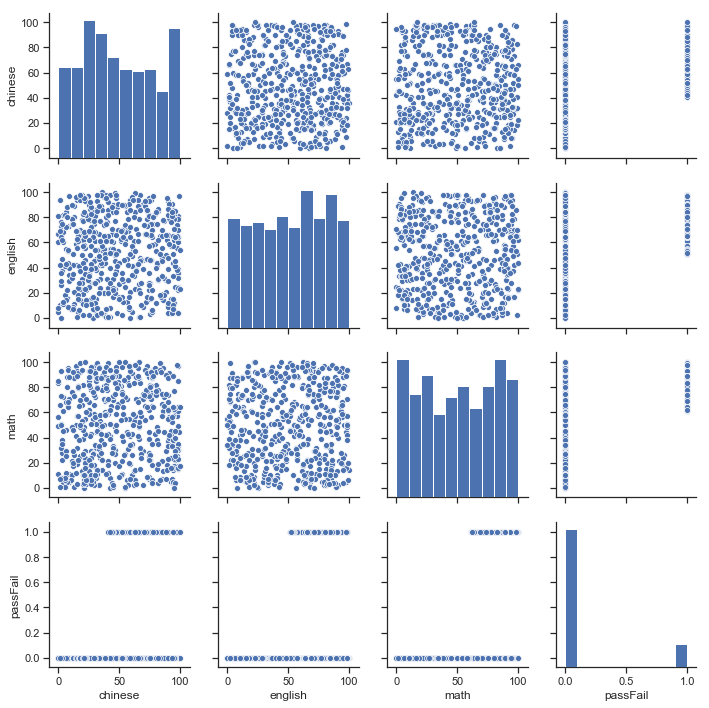

In [3]:
#繪製可視化圖形
import seaborn as sns

#sns.set()#使用預設配色
sns.set(style="ticks", color_codes=True)
#需要對多維數據集進行可視化時，最終都要使用矩陣圖(pair plot)
sns.pairplot(data)

In [4]:
#證實資訊是對的在訓練集多加預測欄位
data['pred']=0
data.columns=['name', 'chinese', 'english', 'math', 'passFail', 'pred']
test.columns=['name', 'chinese', 'english', 'math', 'pred', 'notUse']
#查看欄位資訊
print("data cols=",data.columns)
print("test cols=",test.columns)

data cols= Index(['name', 'chinese', 'english', 'math', 'passFail', 'pred'], dtype='object')
test cols= Index(['name', 'chinese', 'english', 'math', 'pred', 'notUse'], dtype='object')


## Step 2 處理資料: Prepare X, Y

In [5]:
#只擷取需要欄位
x=np.array(data[['chinese','english','math']]).reshape(-1,3)
y=np.array(data['passFail']).reshape(-1,1)
print("x y are prepared,....ok")

testx=np.array(test[['chinese','english','math']]).reshape(-1,3)
testy=np.array(test['pred']).reshape(-1,1)
#print(x.shape)#(84, 3)
print("testx testy are prepared,....ok")

x y are prepared,....ok
testx testy are prepared,....ok


## Step 3 建立線性迴歸分析模型:  Model training

In [6]:
#Python 機器學習套件 scikit-learn
#使用 sklearn.linear_model 的 LinearRegression() 線性迴歸方法
from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier

#模型初始化
model=SVC(kernel='linear',probability=True)

#訓練用fit
model.fit(x,y)


C:\Users\1700140.SYSTEX\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
#假設都用60分及格算結果
test['passFail']=0
test['numPass']=0
con1= test['english']>=60 
con2= test['math']>=60 
con3= test['chinese']>=60 

test.loc[con1,'numPass']+=1
test.loc[con2,'numPass']+=1
test.loc[con3,'numPass']+=1

con4= test['numPass'] >=2 
test.loc[con4,'passFail']=1
condition = (test['passFail']!=test['pred'])
print(len(test.loc[condition,:]))
test.loc[condition,:]
print("testing score =",1- len(test.loc[condition,:])/len(test))

132
testing score = 0.0


## Step 4 評估模型: Evaluate Model

In [8]:
from sklearn.metrics import classification_report
#透過.score方法返回判定係數評估模型好不好(1較好)
score=model.score(x,y)
target_names = ['Pass', 'Fail']

print(classification_report(y, data['pred'], target_names=target_names))
print("score=",model.score(x,y))#判定係數

              precision    recall  f1-score   support

        Pass       0.85      1.00      0.92       435
        Fail       0.00      0.00      0.00        75

   micro avg       0.85      0.85      0.85       510
   macro avg       0.43      0.50      0.46       510
weighted avg       0.73      0.85      0.79       510

score= 0.9333333333333333


C:\Users\1700140.SYSTEX\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\1700140.SYSTEX\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\1700140.SYSTEX\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Step 5 利用訓練好的模型預測資料: Model Predict New Data

In [9]:
#.predict預測,把預測的值寫進pred欄位
data['pred']=model.predict(x)#證實是否是正確
test['pred']=model.predict(testx)#預測結果

test.head(10)

,name,chinese,english,math,pred,notUse,passFail,numPass
0,B0,61,91,67,1.0,NaN,1,3
1,B1,76,18,12,0.0,NaN,0,1
2,B2,39,8,100,0.0,NaN,0,1
3,B3,37,50,16,0.0,NaN,0,0
4,B4,2,100,28,0.0,NaN,0,1
5,B5,7,35,50,0.0,NaN,0,0
6,B6,25,91,51,0.0,NaN,0,1
7,B7,12,71,15,0.0,NaN,0,1
8,B8,39,53,98,0.0,NaN,0,1
9,B9,9,37,56,0.0,NaN,0,0


## Step 6 Write Back

In [10]:
data.head(10)

,name,chinese,english,math,passFail,pred
0,A0,92.0,10.0,42.0,0.0,0.0
1,A1,50.0,17.0,89.0,0.0,0.0
2,A2,32.0,93.0,80.0,0.0,0.0
3,A3,31.0,46.0,88.0,0.0,0.0
4,A4,51.0,61.0,81.0,1.0,0.0
5,A5,42.0,55.0,41.0,0.0,0.0
6,A6,91.0,4.0,91.0,0.0,0.0
7,A7,93.0,91.0,52.0,0.0,1.0
8,A8,34.0,77.0,24.0,0.0,0.0
9,A9,47.0,95.0,59.0,0.0,0.0


## Step 7 寫出資料

In [11]:
test.to_csv("predict_result.csv",mode='w',index=False)